# Understanding Normalized stepper

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

## Linear Steppers

### Advection

The dynamics of the advection equation in 1d

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

on a periodic domain $\Omega = (0, L)$ solved with the exponential time
differencing scheme is uniquely defined by:

1. The `domain_extent` $L$ defining how large the domain is.
2. The `num_points` $N$ defining how many degrees of freedom discretize the domain.
3. The `dt` $\Delta t$ time step describing how far two consecutive states are apart.
4. The `velocity` $c$ advection speed describing how fast the states are moving.

This is reflected in the instantiation of of the `Advection` class.

In [3]:
advection_stepper = ex.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    velocity=0.25,
)

2024-03-01 11:17:18.905150: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_UNKNOWN: unknown error
CUDA backend failed to initialize: INTERNAL: no supported devices found for platform CUDA (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Let us discretize the first sine mode on the corresponding grid

In [4]:
grid = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper.domain_extent,
    num_points=advection_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / advection_stepper.domain_extent * grid)

Let's plot the initial condition next to its first step into the future.
Purposefully, let's not plot the grid on the x-axis.

(Recall that we have to index `[0]` to remove the singleton dimension.)

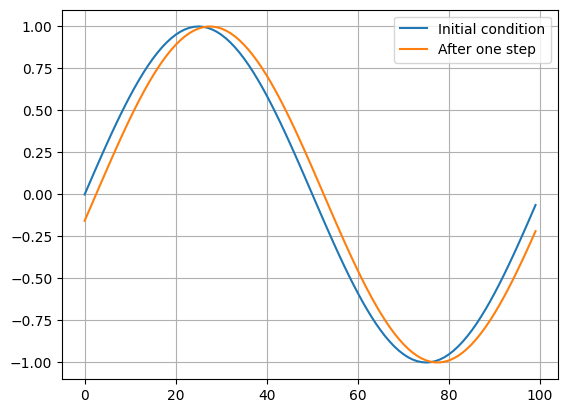

In [5]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(advection_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

Now, let's define three more advection steppers with a slightly different
configuration which adapt the `domain_extent`, `dt`, and `velocity` parameters,
but keep the `num_points` the same.

In comparison to the original `advection_stepper`, these are different by:

2. `advection_stepper_2` has a five times larger `velocity` and a five times smaller `dt`.
3. `advection_stepper_3` has only half the `domain_extent`, but also half the `velocity`.
4. `advection_stepper_4` also only has half the `domain_extent`, but half the `dt`.

In [6]:
advection_stepper_2 = ex.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.1,
    velocity=1.25,
)
advection_stepper_3 = ex.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.5,
    velocity=0.125,
)
advection_stepper_4 = ex.Advection(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.25,
    velocity=0.25,
)

Let's define the first sine mode initial condition on all the respective grids

In [7]:
grid_2 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_2.domain_extent,
    num_points=advection_stepper_2.num_points,
)
u_0_2 = jnp.sin(2 * jnp.pi / advection_stepper_2.domain_extent * grid_2)

grid_3 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_3.domain_extent,
    num_points=advection_stepper_3.num_points,
)
u_0_3 = jnp.sin(2 * jnp.pi / advection_stepper_3.domain_extent * grid_3)

grid_4 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_stepper_4.domain_extent,
    num_points=advection_stepper_4.num_points,
)
u_0_4 = jnp.sin(2 * jnp.pi / advection_stepper_4.domain_extent * grid_4)

Finally, let's plot the initial condition and the first step into the future for all four advection steppers.

Text(0.5, 1.0, 'Advection 4')

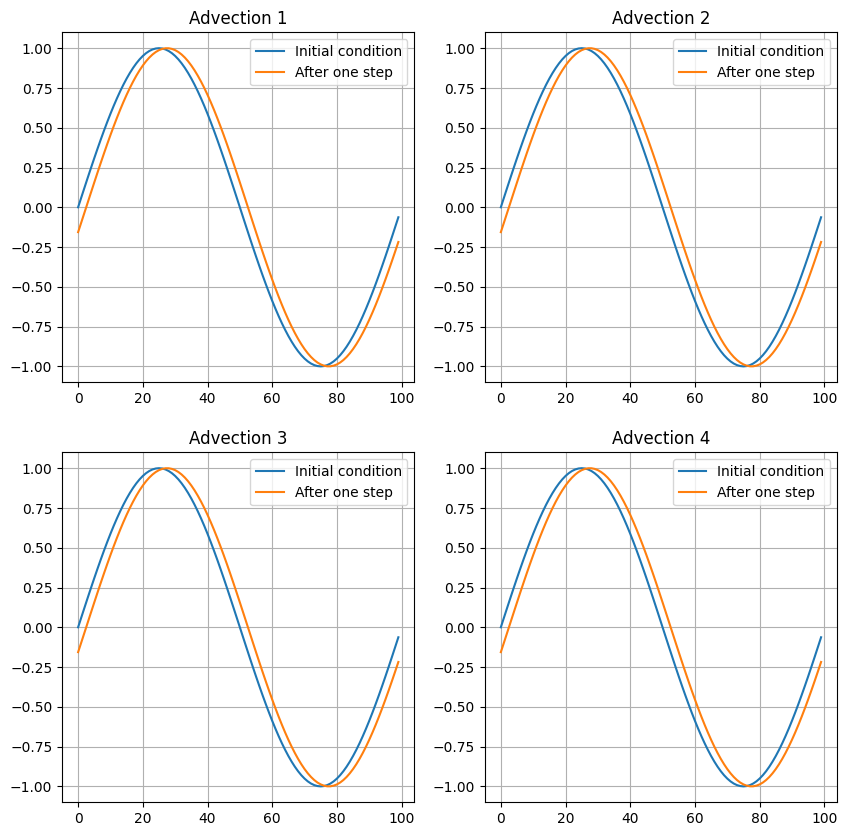

In [8]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(u_0[0], label="Initial condition")
ax_s[0, 0].plot(advection_stepper(u_0)[0], label="After one step")
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Advection 1")

ax_s[0, 1].plot(u_0_2[0], label="Initial condition")
ax_s[0, 1].plot(advection_stepper_2(u_0_2)[0], label="After one step")
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Advection 2")

ax_s[1, 0].plot(u_0_3[0], label="Initial condition")
ax_s[1, 0].plot(advection_stepper_3(u_0_3)[0], label="After one step")
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Advection 3")

ax_s[1, 1].plot(u_0_4[0], label="Initial condition")
ax_s[1, 1].plot(advection_stepper_4(u_0_4)[0], label="After one step")
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Advection 4")

Do you notice that all four plots look the same?

This is because the dynamics of the advection equation is uniquely defined by
the coefficient (dimensionless quantity)

$$ \alpha_1 = \frac{c \Delta t}{L} = \frac{[\frac{m}{s}][s]}{[m]} = [1]$$

### Diffusion Equation

For the diffusion equation in 1d

$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} $$

something similar.

Again, let us start with one fixed example

In [9]:
diffusion_stepper = ex.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    diffusivity=0.2,
)

In [10]:
grid = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper.domain_extent,
    num_points=diffusion_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / diffusion_stepper.domain_extent * grid)

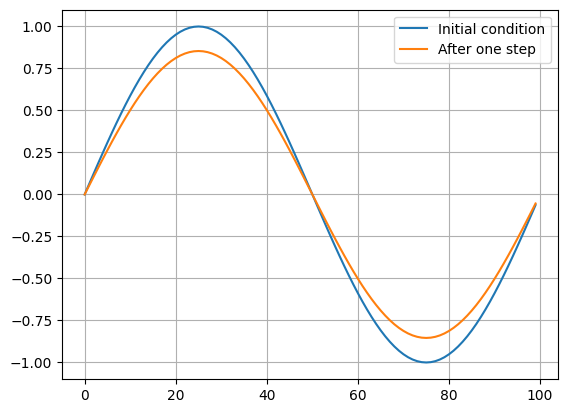

In [11]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(diffusion_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

Now, we again introduce three more diffusion steppers with a slightly different
configuration which adapt the `domain_extent`, `dt`, and `nu` parameters, but
keep the `num_points` the same.

In comparison to the original `diffusion_stepper`, these are different by:

2. `diffusion_stepper_2` has a five times larger `nu` and a five times smaller `dt`.
3. `diffusion_stepper_3` has only half the `domain_extent`, but also **quarter** the `nu`.
4. `diffusion_stepper_4` also only has half the `domain_extent`, but **quarter** the `dt`.

In [12]:
diffusion_stepper_2 = ex.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.1,
    diffusivity=1.0,
)
diffusion_stepper_3 = ex.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.5,
    diffusivity=0.05,
)
diffusion_stepper_4 = ex.Diffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=2.5,
    num_points=100,
    dt=0.125,
    diffusivity=0.2,
)

Again, we discretize the first sine mode on all the respective grids

In [13]:
grid_2 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_2.domain_extent,
    num_points=diffusion_stepper_2.num_points,
)
u_0_2 = jnp.sin(2 * jnp.pi / diffusion_stepper_2.domain_extent * grid_2)

grid_3 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_3.domain_extent,
    num_points=diffusion_stepper_3.num_points,
)
u_0_3 = jnp.sin(2 * jnp.pi / diffusion_stepper_3.domain_extent * grid_3)

grid_4 = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=diffusion_stepper_4.domain_extent,
    num_points=diffusion_stepper_4.num_points,
)
u_0_4 = jnp.sin(2 * jnp.pi / diffusion_stepper_4.domain_extent * grid_4)

And similarly plot the initial condition next to its first step into the future for all four diffusion steppers.

Text(0.5, 1.0, 'Diffusion 4')

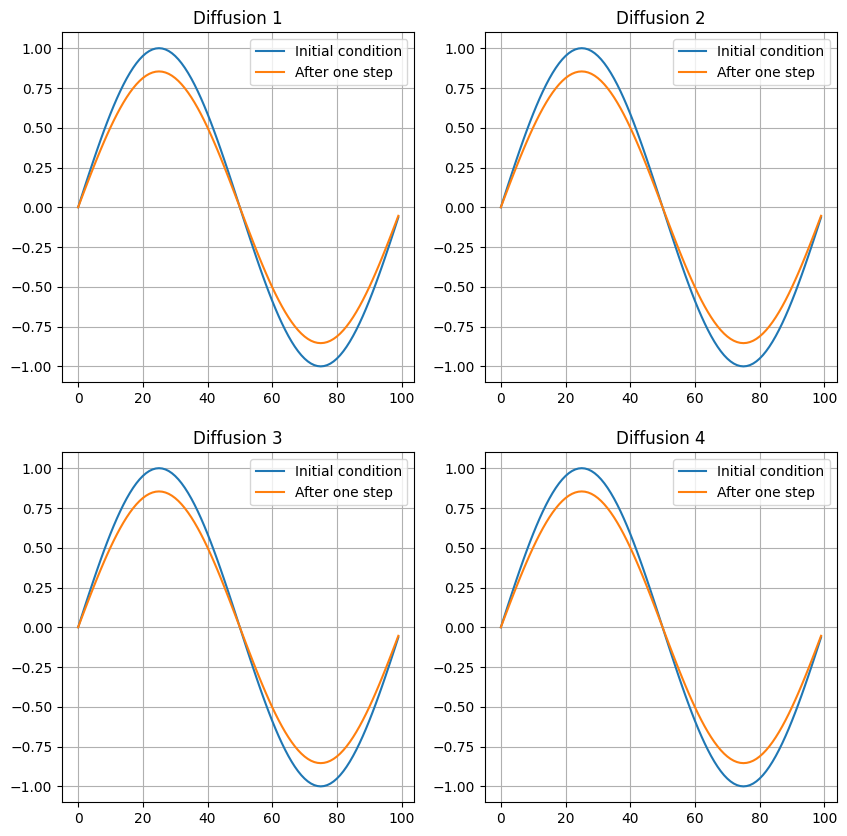

In [14]:
fig, ax_s = plt.subplots(2, 2, figsize=(10, 10))

ax_s[0, 0].plot(u_0[0], label="Initial condition")
ax_s[0, 0].plot(diffusion_stepper(u_0)[0], label="After one step")
ax_s[0, 0].legend()
ax_s[0, 0].grid()
ax_s[0, 0].set_title("Diffusion 1")

ax_s[0, 1].plot(u_0_2[0], label="Initial condition")
ax_s[0, 1].plot(diffusion_stepper_2(u_0_2)[0], label="After one step")
ax_s[0, 1].legend()
ax_s[0, 1].grid()
ax_s[0, 1].set_title("Diffusion 2")

ax_s[1, 0].plot(u_0_3[0], label="Initial condition")
ax_s[1, 0].plot(diffusion_stepper_3(u_0_3)[0], label="After one step")
ax_s[1, 0].legend()
ax_s[1, 0].grid()
ax_s[1, 0].set_title("Diffusion 3")

ax_s[1, 1].plot(u_0_4[0], label="Initial condition")
ax_s[1, 1].plot(diffusion_stepper_4(u_0_4)[0], label="After one step")
ax_s[1, 1].legend()
ax_s[1, 1].grid()
ax_s[1, 1].set_title("Diffusion 4")

For the diffusion equation, the coefficient (dimensionless quantity) is defined
by

$$ \alpha_2 = \frac{\nu \Delta t}{L^2} = \frac{[\frac{m^2}{s}][s]}{[m]^2} = [1]$$

### Advection-Diffusion

The advection-diffusion equation in 1d is given by

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$

Here, we have two constitutive parameters, namely the `velocity` (advection
speed) $c$ and the `diffusivity` (viscosity) $\nu$.

Again, let us start with one fixed example

In [15]:
advection_diffusion_stepper = ex.AdvectionDiffusion(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    velocity=0.25,
    diffusivity=0.2,
)

Again with the first sine mode on the respective domain

In [16]:
grid = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_stepper.domain_extent,
    num_points=advection_diffusion_stepper.num_points,
)
u_0 = jnp.sin(2 * jnp.pi / advection_diffusion_stepper.domain_extent * grid)

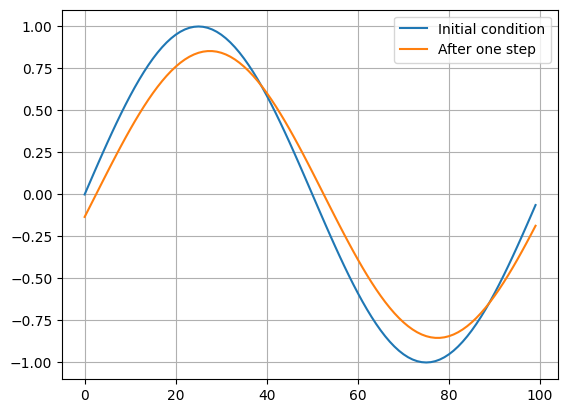

In [17]:
plt.plot(u_0[0], label="Initial condition")
plt.plot(advection_diffusion_stepper(u_0)[0], label="After one step")
plt.legend()
plt.grid()

The advection-diffusion equation is uniquely defined by the two coefficients
(dimensionless quantities)

$$ \alpha_1 = \frac{c \Delta t}{L}$$

$$ \alpha_2 = \frac{\nu \Delta t}{L^2}$$

### General Linear Stepper

A general linear equation can be written as 

$$ \frac{\partial u}{\partial t} = \sum_{j=0}^s  a_j \frac{\partial^j u}{\partial x^j} $$

where $a_j$ are the coefficients of the linear equation.

Relating this to the advection-diffusion equation, we have $c = - a_1$ and $\nu
= a_2$. In more general terms, $a_0$ defines a drag, $a_3$ is the dispersity,
and $a_4$ is related to hyper diffusivity.

Let's instantiate the same advection-diffusion stepper, but with the
`ex.GeneralLinearStepper`. Similar to more concrete steppers of before it also
requires setting `num_spatial_dims`, `domain_extent`, `num_points`, and `dt`.
However, now the prescription of constitutive parameters is via a list of
values. The length of this list defines the highest occuring derivative, i.e. `s
= len(coefficients)`. If you only want to instantiate a stepper with a dynamic
contribution from the third order term (for a dispersion equation), set
`coefficients = [0, 0, 0, dispersivity]` (prepend as many zeros as necessary).

In [18]:
advection_diffusion_general = ex.GeneralLinearStepper(
    1,  # number of dimensions (set to 1)
    domain_extent=5.0,
    num_points=100,
    dt=0.5,
    coefficients=[0.0, -0.25, 0.2],
)

Let's define the first sine mode in the respective grid

In [19]:
general_grid = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_general.domain_extent,
    num_points=advection_diffusion_general.num_points,
)
general_u_0 = jnp.sin(
    2 * jnp.pi / advection_diffusion_general.domain_extent * general_grid
)

Let's plot initial condition and first step into the future of the general
advection-diffusion stepper and the advection-diffusion stepper of before.

Text(0.5, 1.0, 'Advection Diffusion Stepper')

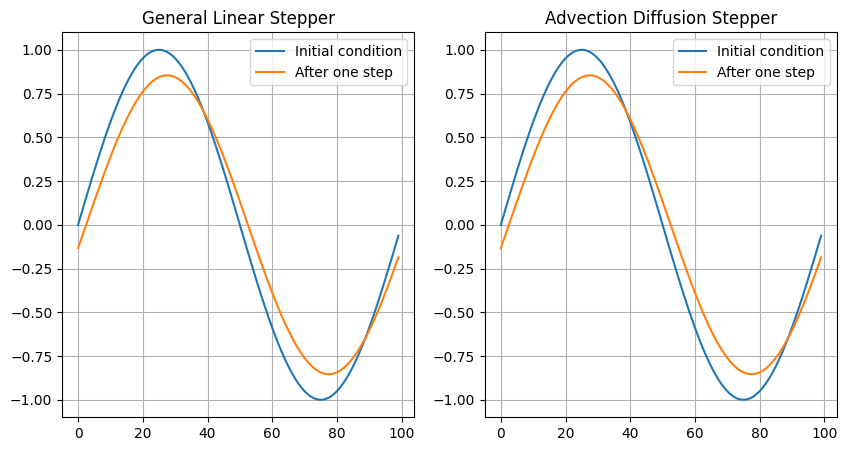

In [20]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(general_u_0[0], label="Initial condition")
ax_s[0].plot(advection_diffusion_general(general_u_0)[0], label="After one step")
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("General Linear Stepper")

ax_s[1].plot(u_0[0], label="Initial condition")
ax_s[1].plot(advection_diffusion_stepper(u_0)[0], label="After one step")
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("Advection Diffusion Stepper")

As expected, they produce the same dynamic. When using `Exponax`, you are free
to either use the general interface or the specialized interface which is
defined for the first four derivatives. Precisely, `Exponax` has defined:

- `AdvectionStepper`
- `DiffusionStepper`
- `AdvectionDiffusionStepper`
- `DispersionStepper`
- `HyperDiffusionStepper`

**Important Remark**: Be careful how to handle the sign in the
`GeneralLinearStepper`. For example, the entry for the `velocity` has to be
negated to have state moving to the right. Another example is the
`hyper_diffusivity` which also has to be negated to have a dissipative effect.

### Normalized Linear Stepper

In conclusion, we now saw two aspects:

1. Any linear PDE (given a combination of an arbitrary number of derivatives
   with their respective constitutive parameters) can be described by a list of
   parameters together with the standard parameters `num_spatial_dims`,
    `domain_extent`, `num_points`, and `dt`.
2. The dynamics of a linear PDE can be uniquely expressed in a coefficient
   (dimensionless quantity) which depends on the respective constitutive `a[j]`,
   the `domain_extent` $L$, and the `dt` $\Delta t$.

More generally speaking, we can express the normalized coefficient for the
dynamics stemming from the $j$-th derivative as

$$ \alpha_j = \frac{a_j \Delta t}{L^j} $$

Hence, it is natural to introduce a `ex.NormalizedLinearStepper` that only takes
the `num_spatial_dims`, `num_points`, and a list of `normalized_coefficients` as
input. With it, we essentially the ambiguity of the `domain_extent` and `dt`
parameters. The `NormalizedLinearStepper` is a very powerful tool to study the
dynamics of linear PDEs.

Let's use it to instantiate a stepper that essentially behaves like the
`ex.GeneralLinearStepper` (representing advection-diffusion) of before.

In [21]:
advection_diffusion_normalized = ex.NormalizedLinearStepper(
    1,  # number of dimensions (set to 1)
    num_points=100,
    normalized_coefficients=[
        0.0,
        -0.25 * 0.5 / 5.0,
        0.2 * 0.5 / (5.0**2),
    ],
)

*If you hover over the `ex.NormalizedLinearStepper` in the code cell above, you see that it also takes the `dt` argument. This is for compatibility with the normalized nonlinear steppers to be introduced in the second half of this notebook. If you are interested in also working with normalized nonlinear steppers, do also check this out since there are some more things to consider.*

Let's investigate the PyTree structure of the normalized stepper.

Since we normalized the coefficients, this stepper uses unit dynamics, hence
`domain_extent=1.0` and `dt=1.0`.

In [23]:
advection_diffusion_normalized

NormalizedLinearStepper(
  num_spatial_dims=1,
  domain_extent=1.0,
  num_points=100,
  num_channels=1,
  dt=1.0,
  dx=0.01,
  _integrator=ETDRK0(dt=1.0, _exp_term=c64[1,51]),
  normalized_coefficients=[0.0, -0.025, 0.004]
)

Let's also create a grid and discretize the first sine mode on it.

In [24]:
normalized_grid = ex.get_grid(
    1,  # number of dimensions (set to 1)
    domain_extent=advection_diffusion_normalized.domain_extent,
    num_points=100,
)
normalized_u_0 = jnp.sin(
    2 * jnp.pi / advection_diffusion_normalized.domain_extent * normalized_grid
)

Let's plot the initial condition and the first step into the future for both the
normalized stepper and the advection-diffusion general stepper it was based on.

Text(0.5, 1.0, 'General Linear Stepper')

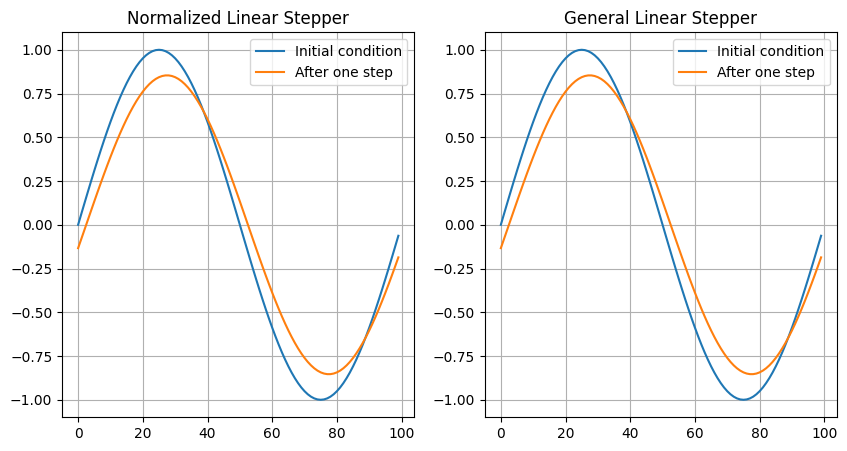

In [25]:
fig, ax_s = plt.subplots(1, 2, figsize=(10, 5))

ax_s[0].plot(normalized_u_0[0], label="Initial condition")
ax_s[0].plot(advection_diffusion_normalized(normalized_u_0)[0], label="After one step")
ax_s[0].legend()
ax_s[0].grid()
ax_s[0].set_title("Normalized Linear Stepper")

ax_s[1].plot(general_u_0[0], label="Initial condition")
ax_s[1].plot(advection_diffusion_general(general_u_0)[0], label="After one step")
ax_s[1].legend()
ax_s[1].grid()
ax_s[1].set_title("General Linear Stepper")

## Nonlinear Steppers

ToDo